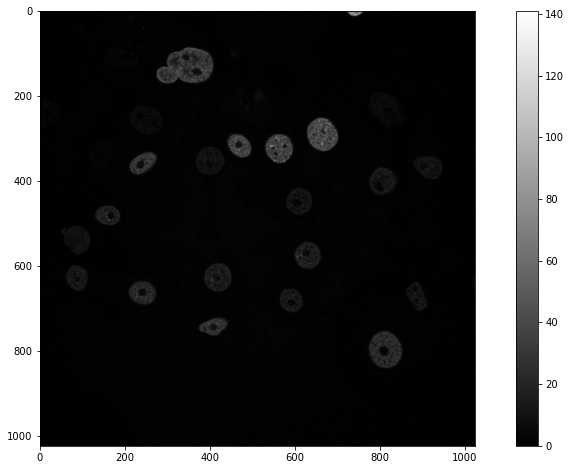

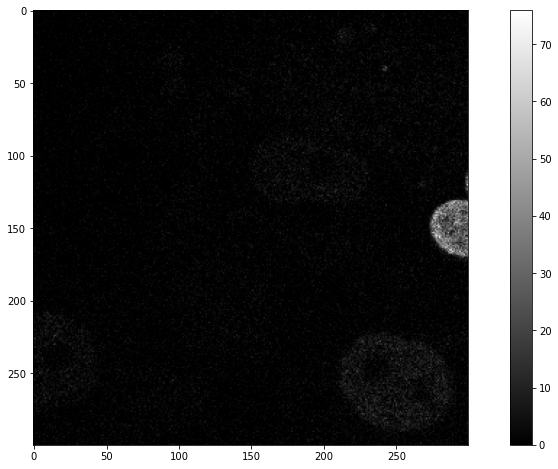

In [1]:
%load_ext autoreload
%autoreload 2
import skimage.io as sk
import numpy as np
from Functions import image_processing as ip

# %pylab
# %matplotlib inline

image = sk.imread("Data/N2DH-GOWT1/img/t01.tif") #Bild zu laden
ip.show_image(image, 15, 8)

image2 = ip.img_resize(image, 300, 300)
ip.show_image(image2, 15, 8)

In [2]:
def standard_deviation_old(img, size): # Größe der Filtermaske, Seitenlänge
    result = np.zeros(img.shape) # Resultat-Bild gleich groß wie Eingangs-Bild
    n = (size - 1) // 2
    for p in np.ndindex(img.shape): # gibt für jedes Pixel ein Tupel mit (Reihe, Spalte)
        neighborhood_sum = 0
        deviation = 0
        if not ip.is_border_pixel(p, img): # Keine Randpixel
            for q in np.ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                neighborhood_sum += img[i,j]
            mean = neighborhood_sum/(size**2)
            for q in np.ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                deviation += (img[i,j] - mean)**2
            result[p] = np.sqrt(1/(size**2) * deviation)
    return result
sd_test = standard_deviation_old(image2,3)
ip.show_image(sd_test, 15, 8)

KeyboardInterrupt: 

In [ ]:
def standard_deviation_new(img, size): # Größe der Filtermaske, Seitenlänge
    result = np.zeros(img.shape) # Resultat-Bild gleich groß wie Eingangs-Bild
    for pixel in np.ndindex(img.shape): # gibt für jedes Pixel ein Tupel mit (Reihe, Spalte)
        if not ip.is_border_pixel(pixel, img): # Keine Randpixel
            neighborhood_sum = ip.filter_iteration_sum(img, pixel, size)
            mean_new = neighborhood_sum/(size**2)
            deviation = ip.filter_iteration_deviation(img, pixel, size, mean_new)
            result[pixel] = np.sqrt(1/(size**2) * deviation)
    return result
sd_test2 = standard_deviation_new(image2,3)
ip.show_image(sd_test2, 15, 8)

In [ ]:
%timeit standarddeviation_old(image2,3)
%timeit standarddeviation_new(image2,3)